In [7]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt


In [8]:
dev = qml.device("default.qubit",wires=5)


0: ──H─╭●──────────╭SWAP──RX(1.57)─┤  
1: ──H─╰X─╭●───────│───────────────┤  
2: ──H────╰X─╭●────│───────────────┤  
3: ──H───────╰X─╭●─│───────────────┤  
4: ──H──────────╰X─╰SWAP───────────┤  


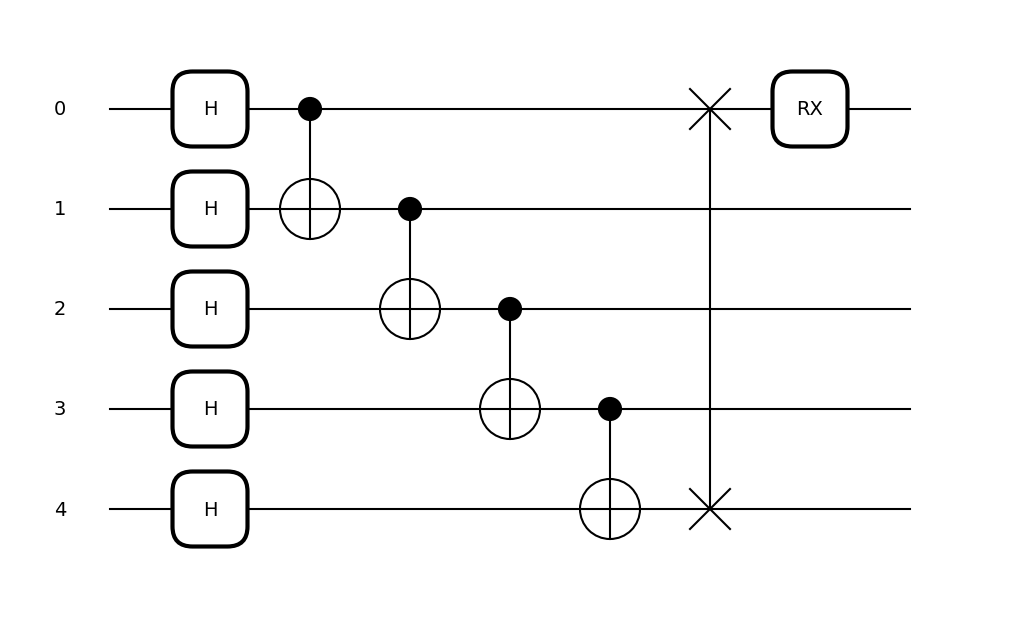

In [9]:
@qml.qnode(dev)
def circuit():
    #hadamard on every qubit
    for i in range(5):
        qml.Hadamard(wires=i)
    #CNOT(control,target) on (0, 1), (1,2), (2,3), (3,4) 
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[2,3])
    qml.CNOT(wires=[3,4])

    #swap (0,4)
    qml.SWAP(wires=[0,4])

    #Rotate X wit pi/2
    qml.RX(np.pi/2,wires=0)

#plot the circuit
drawer = qml.draw(circuit)
print(drawer())
fig, ax = qml.draw_mpl(circuit)()
plt.show()



In [6]:
import pennylane as qml
import numpy as np

# total 5 qubits (4 system and 1 ancillia )
dev = qml.device("default.qubit", wires=5)

@qml.qnode(dev)
def swap_test():
    #hadamard on first qubit
    qml.Hadamard(wires=0)        
    #rotate qq2 by pi/3 around x
    qml.RX(np.pi/3, wires=1)   
    #hadamard on 3 and 4 qubit
    qml.Hadamard(wires=2)               
    qml.Hadamard(wires=3)                
    
    #using anciallia (5th qubit) perform swap test
    #hadamard on ancilla
    qml.Hadamard(wires=4)               
    #swap test between the states of the first and second qubit |q1 q2> and the third and fourth qubit |q3 q4>
    qml.CSWAP(wires=[4, 0, 2])           
    qml.CSWAP(wires=[4, 1, 3])           
    qml.Hadamard(wires=4)                
    
    return qml.probs(wires=4)            # Measure ancilla probabilities

# Run the circuit
probs = swap_test()
overlap_squared = 2 * probs[0] - 1

print(f"Ancilla probabilities: {probs}")
print(f"Squared overlap |<ψ|φ>|²: {overlap_squared:.4f}")

Ancilla probabilities: [0.75 0.25]
Squared overlap |<ψ|φ>|²: 0.5000
